In [1]:
print("""\
# *************************************************************************** #
# *************************************************************************** #
# TP11 : CODES CORRECTEURS D'ERREURS ALGEBRIQUES                              #
# *************************************************************************** #
# *************************************************************************** #
""")

# CONSIGNES
#
# Les seules lignes a modifier sont annoncee par "Code pour l'exercice"
# indique en commmentaire et son signalees
# Ne changez pas le nom des variables
#
# CONSEILS
#
# Ce modele vous sert a restituer votre travail. Il est deconseille d'ecrire
# une longue suite d'instruction et de debugger ensuite. Il vaut mieux tester
# le code que vous produisez ligne apres ligne, afficher les resultats et
# controler que les objets que vous definissez sont bien ceux que vous attendez.
#
# Vous devez verifier votre code en le testant, y compris par des exemples que
# vous aurez fabrique vous-meme.
#


reset()
print("""\
# ****************************************************************************
# CODE DE HAMMING
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

C = codes.HammingCode(GF(2),3)

# Code pour l'EXERCICE

B = C.generator_matrix() # a completer
d = C.minimum_distance() # a completer

# # Affichage des resultats

print( "Le code",C,"a pour matrice")
print( B)
print( "et pour distance minimale d=",d)


reset()

# *************************************************************************** #
# *************************************************************************** #
# TP11 : CODES CORRECTEURS D'ERREURS ALGEBRIQUES                              #
# *************************************************************************** #
# *************************************************************************** #

# ****************************************************************************
# CODE DE HAMMING
# ****************************************************************************

Le code [7, 4] Hamming Code over GF(2) a pour matrice
[1 0 0 0 0 1 1]
[0 1 0 0 1 0 1]
[0 0 1 0 1 1 0]
[0 0 0 1 1 1 1]
et pour distance minimale d= 3


In [25]:
print("""\
# ****************************************************************************
# DECODAGE DE BERLEKAMP-MASSEY
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

from sage.matrix.berlekamp_massey import berlekamp_massey

q=13
Fq = FiniteField(q)
k=5
alpha=Fq(6)
PolFq.<x> = PolynomialRing(Fq)
r = vector(Fq,[5,2,9,9,1,11,7,5,7,4,3,1])

# Code pour l'EXERCICE

G = matrix([[z^j for z in [alpha^i for i in range(12)]] for j in range(k)])
H = matrix([[z^j for z in [alpha^i for i in range(12)]] for j in range(1,12-k+1)])
s = H*r
sigma = PolFq(berlekamp_massey(list(s)[:-1]).reverse())
M = []
for i in range(12):
    if sigma(alpha^(-i))==Fq(0):
        M.append(i)

r = list(r)
r = [r[j] for j in range(len(r)) if j not in M]
r = vector(r)

G = G.matrix_from_columns([i for i in range(12) if i not in M ])
m = G.solve_left(r)

# # Affichage des resultats

print( "La matrice génératrice du code est")
print( G)
print( "La matrice de controle du code est")
print( H)
print( "Le syndrome est")
print( s)
print( "Le polynome localisateur d'erreurs est")
print( sigma)
print( "La position des erreurs est")
print( M)
print( "Le message envoye le plus probable est")
print( m)



reset()

# ****************************************************************************
# DECODAGE DE BERLEKAMP-MASSEY
# ****************************************************************************

La matrice génératrice du code est
[ 1  1  1  1  1  1  1  1  1  1]
[ 1  6 10  9  2 12  7  3  4 11]
[ 1 10  9  3  4  1 10  9  3  4]
[ 1  8 12  1  8 12  5  1 12  5]
[ 1  9  3  9  3  1  9  3  9  3]
La matrice de controle du code est
[ 1  6 10  8  9  2 12  7  3  5  4 11]
[ 1 10  9 12  3  4  1 10  9 12  3  4]
[ 1  8 12  5  1  8 12  5  1  8 12  5]
[ 1  9  3  1  9  3  1  9  3  1  9  3]
[ 1  2  4  8  3  6 12 11  9  5 10  7]
[ 1 12  1 12  1 12  1 12  1 12  1 12]
[ 1  7 10  5  9 11 12  6  3  8  4  2]
Le syndrome est
(3, 0, 10, 0, 3, 0, 10)
Le polynome localisateur d'erreurs est
x^2 + 1
La position des erreurs est
[3, 9]
Le message envoye le plus probable est
(1, 0, 3, 12, 2)


In [35]:
print("""\
# ****************************************************************************
# DECODAGE EN LISTE
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

q=23
Fq = FiniteField(q)
k = 3
alpha=Fq(14)
MPol.<x,y>=PolynomialRing(Fq,2)
 
r=vector(Fq, [12,18,15,22,17,5,14,21,17,4,13,8,4,10, 15,11,22,12,13,9,14,12])

# Code pour l'EXERCICE

b1= floor((22-3+1)/2)
b2= 22 - ceil(sqrt(2*(k-1)*22)) 

liste_exposants = []
i,j = 0, 0
liste_exposants.append((i,j))
while i+2*j < 22 - sqrt(2*(k-1)*22) :
    j+= 1
    while i+2*j < 22 - sqrt(2*(k-1)*22) :
        liste_exposants.append((i,j))
        i+=1
    i=0
            
M = matrix(Fq, [[((alpha^k)^i)*(r[k])^j for k in range(22)] for (i,j) in liste_exposants])

F = kernel(M)
base = F.basis()

polynomes = []

for p in base :
    polynomes.append(sum([p[i]*x^liste_exposants[i][0]*y^liste_exposants[i][1] for i in range(len(p))]))

facteurs = []    

for p in polynomes :
    for q,_ in p.factor():
        if q.polynomial(y).degree() == 1 : # on récupère les facteurs de degré 1 en y
            facteurs.append((-q+y).polynomial(x)) 

facteurs = set(facteurs)

facteurs_finaux = []

for f in facteurs : # on regarde les polynomes qui vérifient ce que l'on veut 
    if f.degree() < k and len([i for i in range(len(r)) if f(alpha^i) == r[i]]) >= 22-12 :
        facteurs_finaux.append(f)
    

G = matrix([[z^j for z in [alpha^i for i in range(22)]] for j in range(k)])   

L = [vector(Fq,[f(alpha^i) for i in range(22)]) for f in facteurs_finaux] # on récupère les mots de codes de la liste
MM = [G.solve_left(c) for c in L]
M = []
for m in MM :
    M.append([chr(Integer(x)+ord('a')) for x in m])
    
d1 = len([i for i in range(len(r)) if r[i]!=L[0][i]]) # compter la distance entre r et le premier mot de code
d2 = len([i for i in range(len(r)) if r[i]!=L[1][i]]) # idem avec le deuxième mot de code

if d1 > d2 : # on choisit le mot de code le plus proche de R
    c = L[1]
    m = M[1]
else : 
    c = L[0]
    m = M[0]
    


# # Affichage des resultats

print( "Le decodage unique fonctionne jusqu'à distance",b1)
print( "Le decodage de Sudan fonctionne jusqu'à distance",b2)
print( "La liste des mots de code les plus proches de r est",L)
print( "Elle correspond aux messages")
print( M)
print( "Le mot de code le plus probable est",c)
print( "soit le message",m)


reset()

# ****************************************************************************
# DECODAGE EN LISTE
# ****************************************************************************

Le decodage unique fonctionne jusqu'à distance 10
Le decodage de Sudan fonctionne jusqu'à distance 12
La liste des mots de code les plus proches de r est [(13, 17, 15, 4, 8, 5, 14, 16, 5, 4, 9, 8, 16, 1, 15, 1, 22, 22, 13, 9, 14, 11), (13, 18, 22, 22, 17, 2, 15, 21, 17, 9, 13, 12, 4, 10, 15, 11, 10, 12, 2, 4, 11, 18)]
Elle correspond aux messages
[['l', 'o', 'l'], ['v', 'm', 'd']]
Le mot de code le plus probable est (13, 18, 22, 22, 17, 2, 15, 21, 17, 9, 13, 12, 4, 10, 15, 11, 10, 12, 2, 4, 11, 18)
soit le message ['v', 'm', 'd']


# ****************************************************************************
# BORNES
# ****************************************************************************



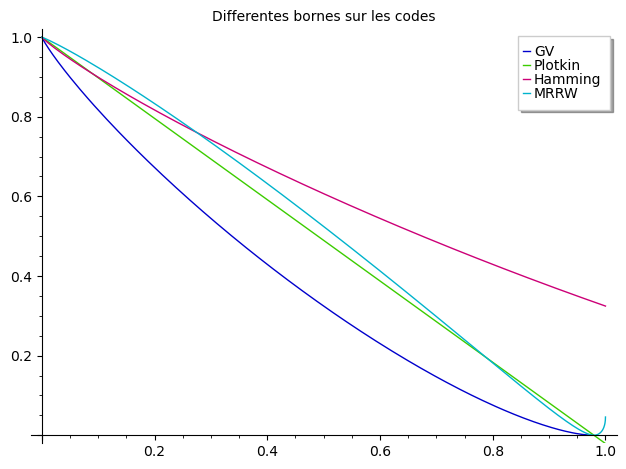

In [40]:
print("""\
# ****************************************************************************
# BORNES
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

q=49

# Code pour l'EXERCICE

def hq(x,q) :
    if x == 0 :
        return 0
    elif x <= 1 - 1/q : 
        return x*log(q-1,q) - x*log(x,q) - (1-x)*log(1-x,q)

gv = lambda x : 1 - hq(x,q)
plotkin = lambda x : 1- x/(1-1/q)
hamming = lambda x : 1 - hq(x/2,q)
mrrw = lambda x : hq(1/q*(q-1-(q-2)*x-2*sqrt((q-1)*x*(1-x))),q)

# # Affichage des resultats

plot([gv,plotkin,hamming,mrrw],xmin=0,xmax=1,ymin=0,ymax=1, legend_label=["GV","Plotkin","Hamming","MRRW"],title="Differentes bornes sur les codes")


# ****************************************************************************
# BORNES BATTANT GILBERT-VARSHAMOV
# ****************************************************************************



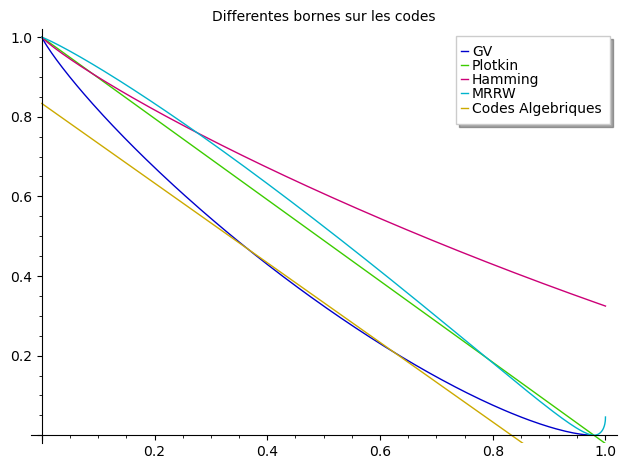

In [41]:
print("""\
# ****************************************************************************
# BORNES BATTANT GILBERT-VARSHAMOV
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

# Code pour l'EXERCICE

codesalg = lambda x : 1 - 1/(sqrt(q)-1) - x

# # Affichage des resultats

plot([gv,plotkin,hamming,mrrw,codesalg],xmin=0,xmax=1,ymin=0,ymax=1, legend_label=["GV","Plotkin","Hamming","MRRW","Codes Algebriques"],title="Differentes bornes sur les codes")
